In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_excel('/content/Gold_data.xlsx', parse_dates=['Date'], index_col='Date')
print(df.head())

               USD     EUR     GBP      INR      AED    CNY
Date                                                       
1985-01-01  308.30  402.45  266.01  3825.85  1134.42    NaN
1985-01-02  305.50  401.49  266.00  3787.05  1134.42    NaN
1985-01-03  302.30  397.08  262.76  3718.88  1107.67    NaN
1985-01-04  303.15  397.15  262.58  3759.64  1118.21    NaN
1985-01-07  298.25  392.55  261.17  3741.23  1091.58  835.8


In [39]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9669 entries, 1985-01-01 to 2022-01-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USD     9669 non-null   float64
 1   EUR     9669 non-null   float64
 2   GBP     9669 non-null   float64
 3   INR     9669 non-null   float64
 4   AED     9669 non-null   float64
 5   CNY     9665 non-null   float64
dtypes: float64(6)
memory usage: 528.8 KB
None
               USD          EUR          GBP            INR          AED  \
count  9669.000000  9669.000000  9669.000000    9669.000000  9669.000000   
mean    750.833871   620.479234   496.608374   39071.461722  2757.624828   
std     506.076245   410.477143   371.560247   38033.058611  1858.985818   
min     252.800000   222.200000   157.150000    3687.170000   928.530000   
25%     353.800000   305.120000   219.310000   11584.750000  1297.540000   
50%     424.550000   361.140000   259.100000   16913.480000  1559.510000   
7

In [40]:
# Ежемесячный ресемплинг (если данные изначально дневные):
df_monthly = df.resample('ME').mean()
# Скользящее среднее с окном в 7 дней (если у вас ежедневные данные):
df['rolling_mean_7'] = df['USD'].rolling(window=7).mean()

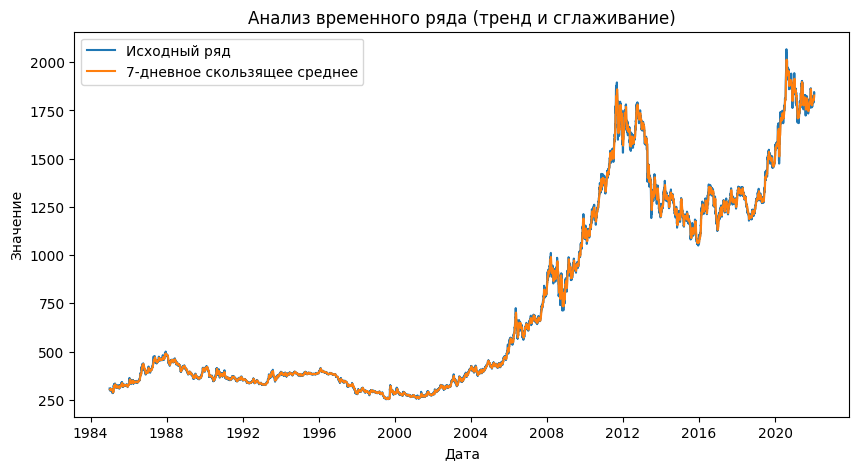

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['USD'], label='Исходный ряд')
plt.plot(df.index, df['rolling_mean_7'], label='7-дневное скользящее среднее')
plt.title("Анализ временного ряда (тренд и сглаживание)")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.show()

In [15]:
!pip install statsmodels
import statsmodels.api as sm

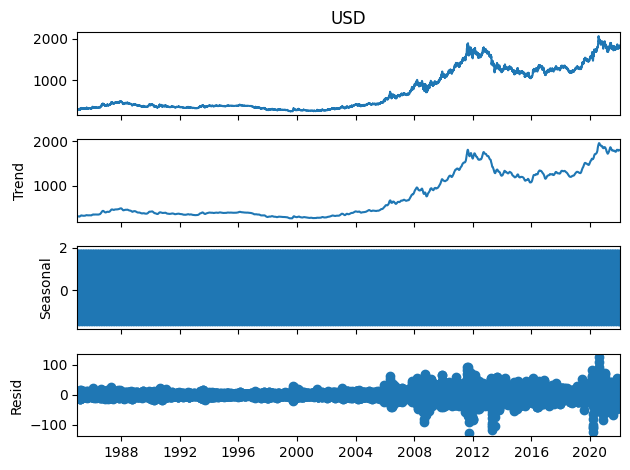

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['USD'], model='additive', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

decomposition.plot()
plt.show()

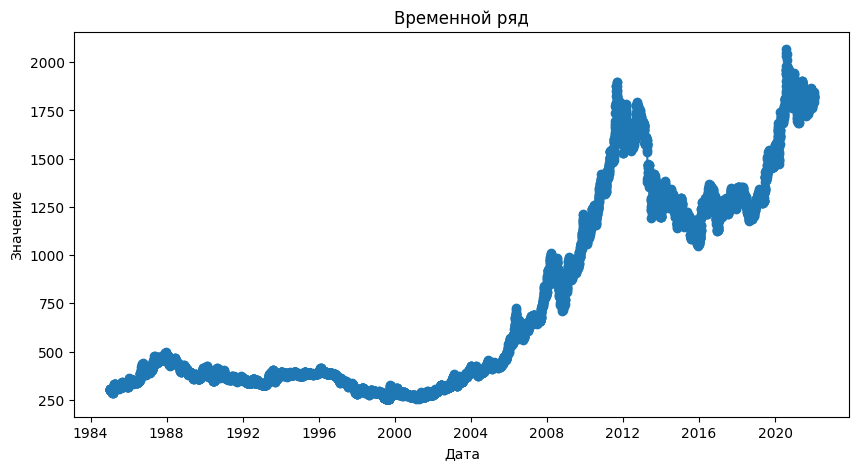

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['USD'], marker='o')
plt.title("Временной ряд")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.show()

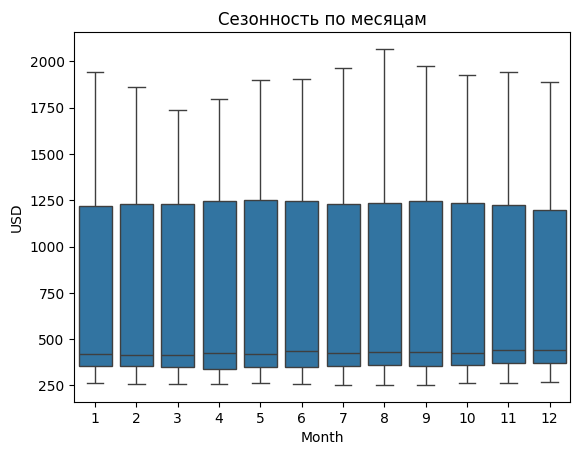

In [25]:
# Предположим, нужно показать сезонность по месяцам (для годового цикла):
df['Month'] = df.index.month
sns.boxplot(x='Month', y='USD', data=df)
plt.title("Сезонность по месяцам")
plt.show()